<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/Time_series_analysis_M7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import yfinance as yf


Download the data

In [ ]:
# Define the ticker symbols for the Magnificent 7
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "TSLA", "META"]

# Download historical data from Yahoo Finance
data = yf.download(tickers, start="2010-01-01", end="2024-05-31")


[*********************100%%**********************]  7 of 7 completed


In [ ]:
data

Price        Adj Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2010-01-04    6.470740    6.695000   15.666453         NaN   23.431585   
2010-01-05    6.481928    6.734500   15.597464         NaN   23.439161   
2010-01-06    6.378826    6.612500   15.204272         NaN   23.295321   
2010-01-07    6.367033    6.500000   14.850323         NaN   23.053049   
2010-01-08    6.409363    6.676000   15.048295         NaN   23.212034   
...                ...         ...         ...         ...         ...   
2024-05-23  186.880005  181.050003  173.351044  465.317993  427.000000   
2024-05-24  189.979996  180.750000  174.789398  477.745667  430.160004   
2024-05-28  189.990005  182.149994  176.197769  479.444000  430.320007   
2024-05-29  190.289993  182.020004  175.698349  473.889465  429.170013   
2024-05-30  191.289993  179.320007  171.912704  466.586731  414.670013   

Price                                    Close                          ...  \
Ticker            NVDA        TSLA        AAPL        AMZN       GOOGL  ...   
Date                                                                    ...   
2010-01-04    0.423988         NaN    7.643214    6.695000   15.684434  ...   
2010-01-05    0.430179         NaN    7.656429    6.734500   15.615365  ...   
2010-01-06    0.432931         NaN    7.534643    6.612500   15.221722  ...   
2010-01-07    0.424447         NaN    7.520714    6.500000   14.867367  ...   
2010-01-08    0.425364         NaN    7.570714    6.676000   15.065566  ...   
...                ...         ...         ...         ...         ...  ...   
2024-05-23  103.790482  173.740005  186.880005  181.050003  173.550003  ...   
2024-05-24  106.460258  179.240005  189.979996  180.750000  174.990005  ...   
2024-05-28  113.891647  176.750000  189.990005  182.149994  176.399994  ...   
2024-05-29  114.815567  176.190002  190.289993  182.020004  175.899994  ...   
2024-05-30  110.490921  178.789993  191.289993  179.320007  172.110001  ...   

Price             Open                             Volume             \
Ticker            MSFT        NVDA        TSLA       AAPL       AMZN   
Date                                                                   
2010-01-04   30.620001    0.462750         NaN  493729600  151998000   
2010-01-05   30.850000    0.460500         NaN  601904800  177038000   
2010-01-06   30.879999    0.468750         NaN  552160000  143576000   
2010-01-07   30.629999    0.469500         NaN  477131200  220604000   
2010-01-08   30.280001    0.459000         NaN  447610800  196610000   
...                ...         ...         ...        ...        ...   
2024-05-23  432.970001  102.028000  181.800003   51005900   33670200   
2024-05-24  427.190002  104.448997  174.839996   36294600   27434100   
2024-05-28  429.630005  110.244003  176.399994   52280100   29927000   
2024-05-29  425.690002  113.050003  174.190002   53068000   32009300   
2024-05-30  424.299988  114.650002  178.580002   49947900   29249200   

Price                                                               
Ticker          GOOGL        META      MSFT       NVDA        TSLA  
Date                                                                
2010-01-04   78169752         NaN  38409100  800204000         NaN  
2010-01-05  120067812         NaN  49749600  728648000         NaN  
2010-01-06  158988852         NaN  58182400  649168000         NaN  
2010-01-07  256315428         NaN  50559700  547792000         NaN  
2010-01-08  188783028         NaN  51197400  478168000         NaN  
...               ...         ...       ...        ...         ...  
2024-05-23   21024900  11747900.0  17211700  835065000  71975500.0  
2024-05-24   16572500  12012300.0  11845800  429494000  65479700.0  
2024-05-28   20572200  10175800.0  15718000  652728000  59736600.0  
2024-05-29   233887

In [ ]:
def extract_features(data):
    features = []
    # Example: Mean and Standard Deviation
    features.append(np.mean(data))
    features.append(np.std(data))
    return features

In [ ]:
variable_features = {}
for column in df.columns:
    features = extract_features(df[column])
    variable_features[column] = features

NameError: name 'df' is not defined

In [ ]:
# Select the adjusted close prices
adj_close = data['Adj Close']

# Handle missing values
adj_close = adj_close.fillna(method='ffill')

# Ensure there are no remaining NaNs
adj_close = adj_close.dropna()


Residual PLOT

Standardize the data

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(adj_close)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, index=adj_close.index, columns=adj_close.columns)


In [ ]:
target_stock = 'NVDA'
predictors = [col for col in scaled_data.columns if col != target_stock]

In [ ]:
X = scaled_data[predictors]
y = scaled_data[target_stock]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
predicted_values = model.predict(X)

In [ ]:
residuals = y - predicted_values

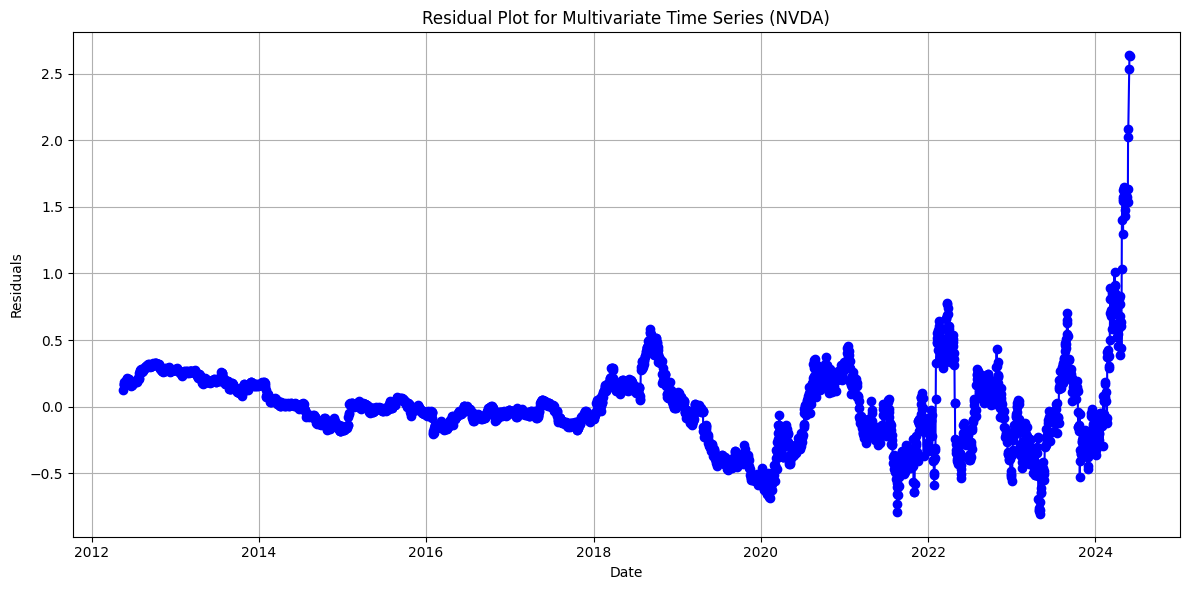

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(scaled_data.index, residuals, marker='o', linestyle='-', color='b')
plt.title('Residual Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

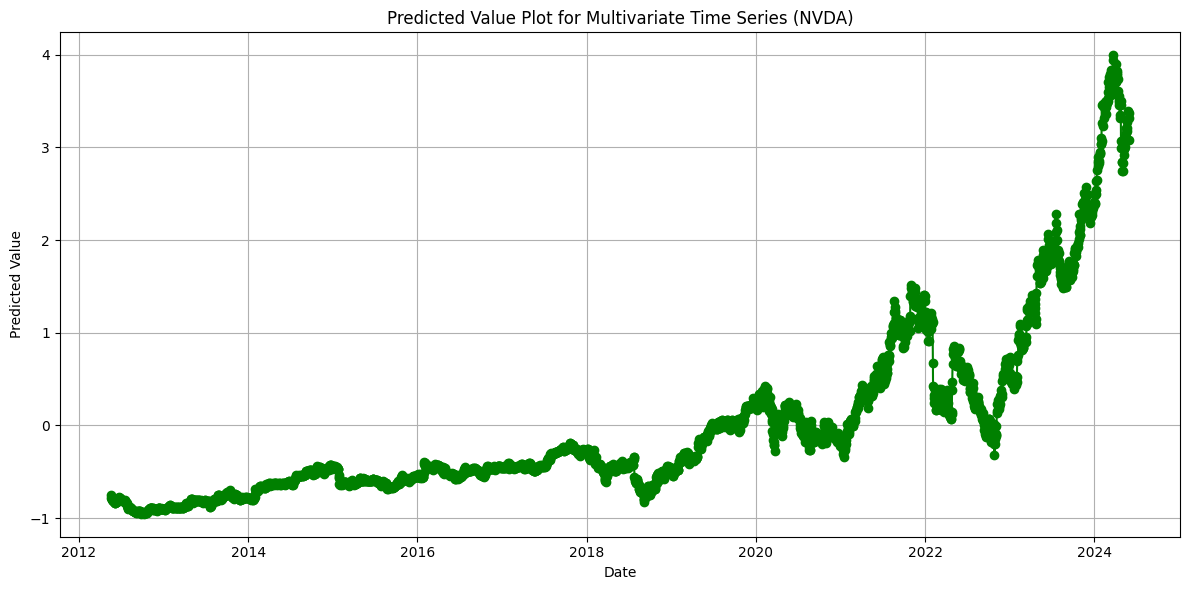

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(scaled_data.index, predicted_values, marker='o', linestyle='-', color='g')
plt.title('Predicted Value Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.tight_layout()
plt.show()

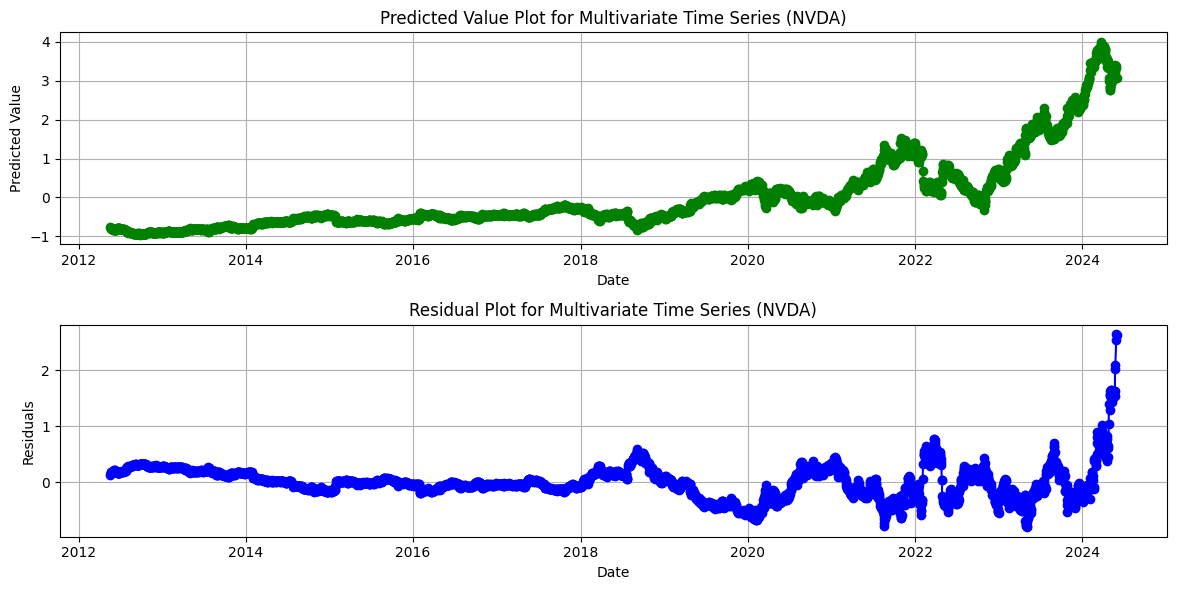

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(scaled_data.index, predicted_values, marker='o', linestyle='-', color='g')
plt.title('Predicted Value Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(scaled_data.index, residuals, marker='o', linestyle='-', color='b')
plt.title('Residual Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: plot both predicted value and residual value

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(scaled_data.index, predicted_values, marker='o', linestyle='-', color='g')
plt.title('Predicted Value Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(scaled_data.index, residuals, marker='o', linestyle='-', color='b')
plt.title('Residual Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


Feature extraction

1. Statistical Feature extraction

In [ ]:
!pip install scipy
import pandas as pd
from scipy.stats import skew, kurtosis

In [ ]:
def extract_features(df):
    features = pd.DataFrame(index=df.columns)

    # Mean
    features['mean'] = df.mean()

    # Standard Deviation
    features['std'] = df.std()

    # Skewness
    features['skew'] = df.apply(skew)

    # Kurtosis
    features['kurtosis'] = df.apply(kurtosis)

    # Autocorrelation (lag-1)
    features['autocorr'] = df.apply(lambda x: x.autocorr(lag=1))

    # Maximum
    features['max'] = df.max()

    # Minimum
    features['min'] = df.min()

    # Median
    features['median'] = df.median()

    # Quantiles
    features['q25'] = df.quantile(0.25)
    features['q75'] = df.quantile(0.75)

    # Return the DataFrame of features
    return features


In [ ]:
# Extract features
features = extract_features(adj_close)

# Display the features
print(features)


              mean         std      skew  kurtosis  autocorr         max  \
Ticker                                                                     
AAPL     71.414571   59.213711  0.773150 -1.018645  0.999622  197.857529   
AMZN     77.965082   55.713293  0.379384 -1.235096  0.999363  189.500000   
GOOGL    65.309197   40.801754  0.758561 -0.657618  0.999383  177.646118   
META    167.752305  105.179226  0.855316  0.570262  0.998961  526.816956   
MSFT    137.594206  113.896224  0.811491 -0.612798  0.999654  430.519989   
NVDA     11.132470   17.402244  2.747085  8.572139  0.999294  114.815567   
TSLA     85.247455  105.241605  1.089056 -0.305589  0.998837  409.970001   

              min      median        q25         q75  
Ticker                                                
AAPL    11.982236   41.376919  24.212846  130.933525  
AMZN    10.411000   79.047501  21.463500  124.863503  
GOOGL   13.974202   53.931103  29.809704   97.333290  
META    17.693642  159.731766  82.146191

Visualize statistical features

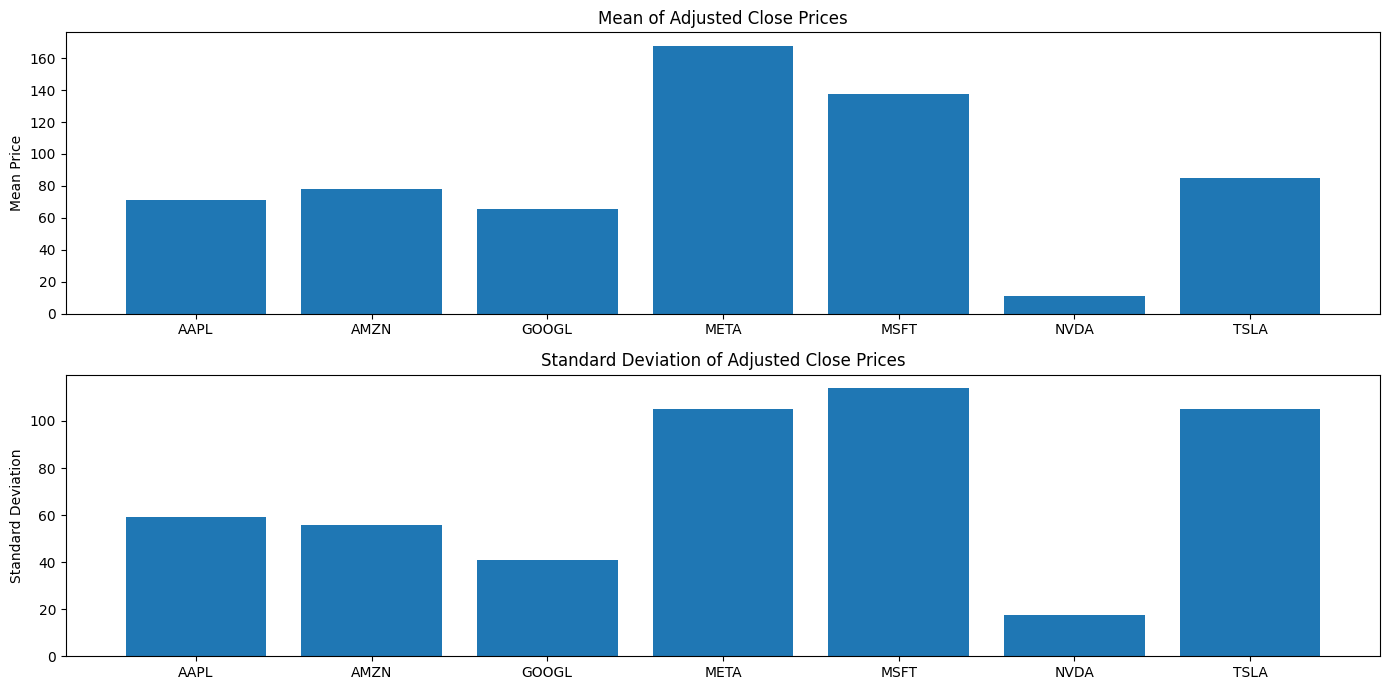

In [ ]:
# Plot the mean and standard deviation of the stock prices
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.bar(features.index, features['mean'])
plt.title('Mean of Adjusted Close Prices')
plt.ylabel('Mean Price')

plt.subplot(2, 1, 2)
plt.bar(features.index, features['std'])
plt.title('Standard Deviation of Adjusted Close Prices')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()


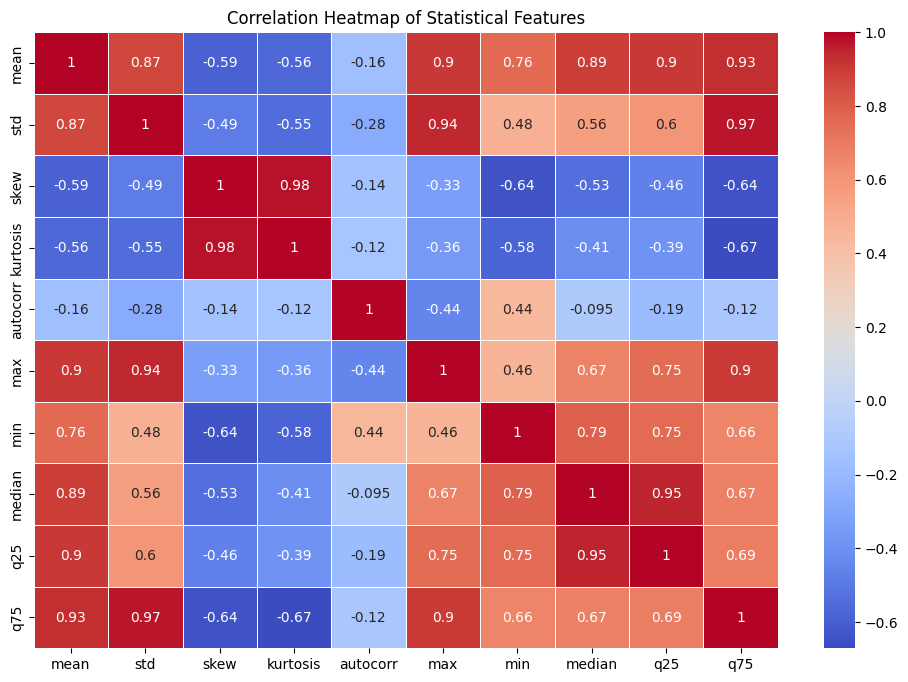

In [ ]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = features.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Statistical Features')
plt.show()


Look for highly correlated pairs

> Add blockquote



Highly Correlated Pairs: Identify pairs of features with high absolute correlation coefficients (e.g., above 0.7 or below -0.7). These pairs might represent redundant information, and you may choose to keep only one of each pair.

In [ ]:
# Example: Extract highly correlated pairs
threshold = 0.7
high_corr_pairs = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.add((col1, col2))

print("Highly correlated feature pairs:", high_corr_pairs)


Highly correlated feature pairs: {('std', 'mean'), ('q25', 'mean'), ('median', 'mean'), ('q25', 'min'), ('q75', 'mean'), ('q25', 'median'), ('kurtosis', 'skew'), ('median', 'min'), ('max', 'std'), ('q75', 'std'), ('q75', 'max'), ('max', 'mean'), ('min', 'mean')}


Feature Selection: Use statistical techniques (e.g., variance thresholding, feature importance from machine learning models) to select features that have the highest impact or relevance to the target variable.

Lagg Feature

In [ ]:
import pandas as pd

def create_lag_features(df, lags):
    """
    Create lag features for each column in the dataframe.

    Parameters:
    df (pd.DataFrame): Original dataframe with time series data.
    lags (int): Number of lag features to create for each column.

    Returns:
    pd.DataFrame: Dataframe with original columns and additional lag features.
    """
    lagged_df = df.copy()
    for lag in range(1, lags + 1):
        lagged = df.shift(lag)
        lagged.columns = [f'{col}_lag{lag}' for col in df.columns]
        lagged_df = pd.concat([lagged_df, lagged], axis=1)
    return lagged_df

# Load data as previously described
# Assume combined_data is already loaded with stock prices

# Create lag features
num_lags = 10
lagged_data = create_lag_features(data, num_lags)

# Drop rows with NaN values created by lagging
lagged_data = lagged_data.dropna()

print(lagged_data.head())


            (Adj Close, AAPL)  (Adj Close, AMZN)  (Adj Close, GOOGL)  \
Date                                                                   
2012-06-04          17.061701            10.7285           14.462630   
2012-06-05          17.017551            10.6605           14.258161   
2012-06-06          17.278490            10.8820           14.512123   
2012-06-07          17.286350            10.9400           14.453631   
2012-06-08          17.546375            10.9240           14.509124   

            (Adj Close, META)  (Adj Close, MSFT)  (Adj Close, NVDA)  \
Date                                                                  
2012-06-04          26.844835          22.949692           0.268977   
2012-06-05          25.816948          22.917538           0.276773   
2012-06-06          26.755020          23.592766           0.284111   
2012-06-07          26.256044          23.496304           0.272646   
2012-06-08          27.044426          23.833920           0.277920  

In [ ]:
from statsmodels.tsa.api import VAR

# Fit the VAR model using the lagged data
model = VAR(lagged_data)
results = model.fit(num_lags)
print(results.summary())

# Forecasting
forecast_input = lagged_data.values[-num_lags:]
forecast = results.forecast(y=forecast_input, steps=10)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=combined_data.index[-1], periods=10, freq='B'), columns=lagged_data.columns)
print(forecast_df)

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for col in combined_data.columns:
    plt.plot(combined_data.index, combined_data[col], label=f'Original {col}')
    plt.plot(forecast_df.index, forecast_df[[col]], label=f'Forecast {col}', linestyle='--')

plt.title('Forecasted Stock Prices with Lag Features')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: 9-th leading minor of the array is not positive definite

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def create_lag_features(df, lags):
    """
    Create lag features for each column in the dataframe.

    Parameters:
    df (pd.DataFrame): Original dataframe with time series data.
    lags (int): Number of lag features to create for each column.

    Returns:
    pd.DataFrame: Dataframe with original columns and additional lag features.
    """
    lagged_df = df.copy()
    for lag in range(1, lags + 1):
        lagged = df.shift(lag)
        lagged.columns = [f'{col}_lag{lag}' for col in df.columns]
        lagged_df = pd.concat([lagged_df, lagged], axis=1)
    return lagged_df

# Load data as previously described
# Assume combined_data is already loaded with stock prices

# Standardize the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

# Create lag features
num_lags = 5  # Reduce the number of lags
lagged_data = create_lag_features(scaled_data, num_lags)

# Drop rows with NaN values created by lagging
lagged_data = lagged_data.dropna()

# Fit the VAR model using the lagged data
model = VAR(lagged_data)
results = model.fit(num_lags)
print(results.summary())

# Forecasting
forecast_input = lagged_data.values[-num_lags:]
forecast = results.forecast(y=forecast_input, steps=10)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=combined_data.index[-1], periods=10, freq='B'), columns=lagged_data.columns)

# Reverse the standardization for plotting
forecast_df_original = pd.DataFrame(scaler.inverse_transform(forecast_df[combined_data.columns]), index=forecast_df.index, columns=combined_data.columns)

# Plot the forecast
plt.figure(figsize=(14, 8))
for col in combined_data.columns:
    plt.plot(combined_data.index, combined_data[col], label=f'Original {col}')
    plt.plot(forecast_df_original.index, forecast_df_original[col], label=f'Forecast {col}', linestyle='--')

plt.title('Forecasted Stock Prices with Lag Features')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: 14-th leading minor of the array is not positive definite

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def create_lag_features(df, lags):
    """
    Create lag features for each column in the dataframe.

    Parameters:
    df (pd.DataFrame): Original dataframe with time series data.
    lags (int): Number of lag features to create for each column.

    Returns:
    pd.DataFrame: Dataframe with original columns and additional lag features.
    """
    lagged_df = df.copy()
    for lag in range(1, lags + 1):
        lagged = df.shift(lag)
        lagged.columns = [f'{col}_lag{lag}' for col in df.columns]
        lagged_df = pd.concat([lagged_df, lagged], axis=1)
    return lagged_df

# Load data as previously described
# Assume combined_data is already loaded with stock prices

# Standardize the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

# Create lag features
num_lags = 3  # Reduce the number of lags further
lagged_data = create_lag_features(scaled_data, num_lags)

# Drop rows with NaN values created by lagging
lagged_data = lagged_data.dropna()

# Check for multicollinearity
corr_matrix = lagged_data.corr()
print(corr_matrix)

# Fit the VAR model using the lagged data
model = VAR(lagged_data)
try:
    results = model.fit(num_lags)
    print(results.summary())

    # Forecasting
    forecast_input = lagged_data.values[-num_lags:]
    forecast = results.forecast(y=forecast_input, steps=10)
    forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data.index[-1], periods=10, freq='B'), columns=lagged_data.columns)

    # Reverse the standardization for plotting
    forecast_df_original = pd.DataFrame(scaler.inverse_transform(forecast_df[data.columns]), index=forecast_df.index, columns=combined_data.columns)

    # Plot the forecast
    plt.figure(figsize=(14, 8))
    for col in combined_data.columns:
        plt.plot(combined_data.index, combined_data[col], label=f'Original {col}')
        plt.plot(forecast_df_original.index, forecast_df_original[col], label=f'Forecast {col}', linestyle='--')

    plt.title('Forecasted Stock Prices with Lag Features')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

except np.linalg.LinAlgError as e:
    print(f"Error fitting VAR model: {e}")
    print("Try reducing the number of lags further or consider adding regularization.")


                          (Adj Close, AAPL)  (Adj Close, AMZN)  \
(Adj Close, AAPL)                  1.000000           0.884139   
(Adj Close, AMZN)                  0.884139           1.000000   
(Adj Close, GOOGL)                 0.964398           0.925062   
(Adj Close, META)                  0.815298           0.915359   
(Adj Close, MSFT)                  0.982302           0.914773   
...                                     ...                ...   
('Volume', 'GOOGL')_lag3          -0.334368          -0.393663   
('Volume', 'META')_lag3           -0.216981          -0.315897   
('Volume', 'MSFT')_lag3           -0.223107          -0.258329   
('Volume', 'NVDA')_lag3            0.074270           0.098019   
('Volume', 'TSLA')_lag3            0.097062           0.195324   

                          (Adj Close, GOOGL)  (Adj Close, META)  \
(Adj Close, AAPL)                   0.964398           0.815298   
(Adj Close, AMZN)                   0.925062           0.915359   
(Adj C

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Error fitting VAR model: 9-th leading minor of the array is not positive definite
Try reducing the number of lags further or consider adding regularization.


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Further reduce the number of lags
num_lags = 1  # Reduced from 3
lagged_data = create_lag_features(data, num_lags)

# Drop rows with NaN values created by lagging
lagged_data = lagged_data.dropna()

# Check for high correlation and drop highly correlated features if necessary
corr_matrix = lagged_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)] # Adjust threshold as needed
lagged_data = lagged_data.drop(to_drop, axis=1)

# Fit the VAR model using the lagged data
model = VAR(lagged_data)

# Try fitting the model with method='ols' to handle potential singularity
results = model.fit(maxlags=1, method='ols')

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


TypeError: not all arguments converted during string formatting

In [ ]:

# Forecasting
forecast_input = lagged_data.values[-num_lags:]
forecast = results.forecast(y=forecast_input, steps=10)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=combined_data.index[-1], periods=10, freq='B'), columns=lagged_data.columns)
print(forecast_df)

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for col in combined_data.columns:
    plt.plot(combined_data.index, combined_data[col], label=f'Original {col}')
    plt.plot(forecast_df.index, forecast_df[[col]], label=f'Forecast {col}', linestyle='--')

plt.title('Forecasted Stock Prices with Lag Features')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: 9-th leading minor of the array is not positive definite

2. Time Based Feature extraction


Time-based feature extraction in multivariate time series involves deriving features that capture patterns over time for each variable

In [ ]:
!pip install statsmodels
import pandas as pd
from statsmodels.tsa.stattools import acf
from scipy.stats import skew, kurtosis

In [ ]:
def extract_time_features(df):
    features = pd.DataFrame(index=df.columns)

    # Rolling Statistics (e.g., mean, std)
    features['roll_mean'] = df.rolling(window=30, min_periods=1, axis=0).mean().iloc[-1]
    features['roll_std'] = df.rolling(window=30, min_periods=1, axis=0).std().iloc[-1]

    # Autocorrelation (e.g., lag 1, 7, 30)
    for lag in [1, 7, 30]:
        features[f'autocorr_lag{lag}'] = df.apply(lambda x: acf(x, nlags=lag)[lag], axis=0)

    # Skewness and Kurtosis
    features['skewness'] = df.apply(skew)
    features['kurtosis'] = df.apply(kurtosis)

    return features


In [ ]:
# Extract time-based features
time_features = extract_time_features(adj_close)

# Display the extracted features
print(time_features)


         roll_mean   roll_std  autocorr_lag1  autocorr_lag7  autocorr_lag30  \
Ticker                                                                        
AAPL    180.762000   9.645822       0.998800       0.991935        0.968329   
AMZN    182.396667   4.451351       0.998576       0.990131        0.959503   
GOOGL   168.208282   7.127366       0.998004       0.986323        0.947791   
META    467.061273  17.997059       0.997377       0.982355        0.922308   
MSFT    412.954000  11.737590       0.998510       0.989484        0.958759   
NVDA     91.799993   9.720255       0.993830       0.960509        0.864854   
TSLA    172.755333  12.310125       0.998603       0.990235        0.955307   

        skewness  kurtosis  
Ticker                      
AAPL    0.773150 -1.018645  
AMZN    0.379384 -1.235096  
GOOGL   0.758561 -0.657618  
META    0.855316  0.570262  
MSFT    0.811491 -0.612798  
NVDA    2.747085  8.572139  
TSLA    1.089056 -0.305589  


Auto correlation

In [ ]:
!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

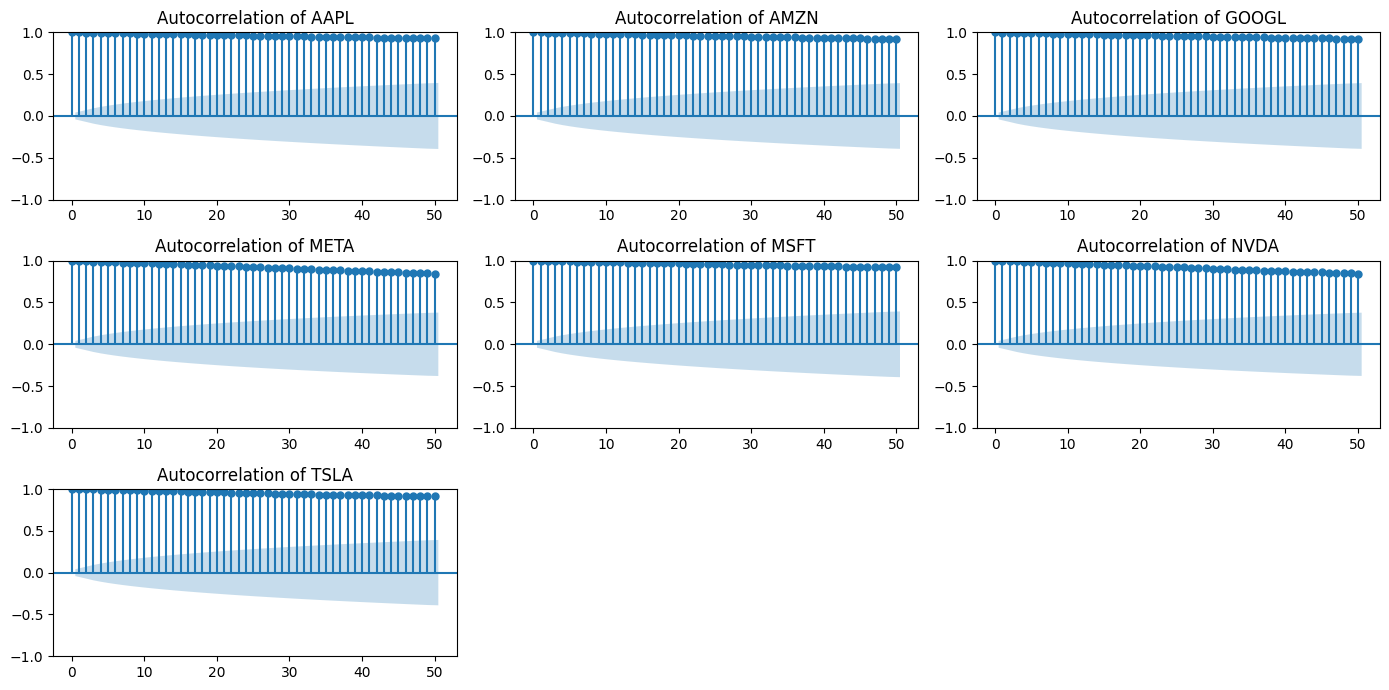

In [ ]:
# Plot autocorrelation for each stock
plt.figure(figsize=(14, 7))
for i, ticker in enumerate(adj_close.columns):
    plt.subplot(3, 3, i + 1)
    plot_acf(adj_close[ticker], lags=50, ax=plt.gca(), title=f'Autocorrelation of {ticker}')
    plt.tight_layout()

plt.show()


Autocorrelation, also known as serial correlation, is a measure of how a time series is correlated with a lagged version of itself. Understanding autocorrelation provides insights into the temporal dependencies and patterns within the data. Here's what autocorrelation suggests and how it is interpreted:

- POSITIVE AUTOCORRELATION
-NEGATIVE AUTOCORRELATION
- ZERO AUTOCORRELATION


3. Frequency domain features

Feature extraction based on frequency domain features in multivariate time series involves transforming the time-domain signals into the frequency domain using techniques such as Fourier Transform or Wavelet Transform, and then extracting relevant features from the transformed data.

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import welch

In [ ]:
def extract_frequency_features(df):
    features = pd.DataFrame(index=df.columns)

    for column in df.columns:
        # Compute power spectral density using Welch method
        f, Pxx = welch(df[column], nperseg=256)  # Adjust nperseg based on your data

        # Calculate frequency domain features
        features[f'{column}_freq_mean'] = np.mean(Pxx)
        features[f'{column}_freq_std'] = np.std(Pxx)
        features[f'{column}_freq_max'] = np.max(Pxx)
        features[f'{column}_freq_min'] = np.min(Pxx)
        features[f'{column}_freq_entropy'] = -np.sum(Pxx * np.log2(Pxx + 1e-12))

    return features


In [ ]:
# Extract frequency domain features
frequency_features = extract_frequency_features(adj_close)

# Display the extracted features
print(frequency_features)


        AAPL_freq_mean  AAPL_freq_std  AAPL_freq_max  AAPL_freq_min  \
Ticker                                                                
AAPL        132.521894     807.204644    8530.734963       0.666209   
AMZN        132.521894     807.204644    8530.734963       0.666209   
GOOGL       132.521894     807.204644    8530.734963       0.666209   
META        132.521894     807.204644    8530.734963       0.666209   
MSFT        132.521894     807.204644    8530.734963       0.666209   
NVDA        132.521894     807.204644    8530.734963       0.666209   
TSLA        132.521894     807.204644    8530.734963       0.666209   

        AAPL_freq_entropy  AMZN_freq_mean  AMZN_freq_std  AMZN_freq_max  \
Ticker                                                                    
AAPL       -194524.984389      199.161106    1197.335699   12864.673597   
AMZN       -194524.984389      199.161106    1197.335699   12864.673597   
GOOGL      -194524.984389      199.161106    1197.335699   1

4 Shape based feature

Shape-based feature extraction in multivariate time series analysis involves capturing characteristics related to the overall shape and patterns present in the time series data. This typically includes features that describe aspects such as trends, cycles, peaks, and valleys in the data.

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
def extract_shape_features(df):
    features = pd.DataFrame(index=df.columns)

    for column in df.columns:
        # Calculate mean, standard deviation, min, max
        features[f'{column}_mean'] = df[column].mean()
        features[f'{column}_std'] = df[column].std()
        features[f'{column}_min'] = df[column].min()
        features[f'{column}_max'] = df[column].max()

        # Find peaks and valleys
        peaks, _ = find_peaks(df[column])
        valleys, _ = find_peaks(-df[column])

        features[f'{column}_num_peaks'] = len(peaks)
        features[f'{column}_num_valleys'] = len(valleys)

        # Calculate peak-to-peak and peak-to-valley differences
        if len(peaks) > 1:
            features[f'{column}_peak_to_peak_diff'] = np.diff(df[column].iloc[peaks]).mean()
        else:
            features[f'{column}_peak_to_peak_diff'] = np.nan

        if len(peaks) > 0 and len(valleys) > 0:
            features[f'{column}_peak_to_valley_diff'] = np.mean(df[column].iloc[peaks].values - df[column].iloc[valleys].values)
        else:
            features[f'{column}_peak_to_valley_diff'] = np.nan

    return features


In [ ]:
def extract_shape_features(df):
    features = pd.DataFrame(index=df.columns)

    for column in df.columns:
        # Calculate mean, standard deviation, min, max
        features[f'{column}_mean'] = df[column].mean()
        features[f'{column}_std'] = df[column].std()
        features[f'{column}_min'] = df[column].min()
        features[f'{column}_max'] = df[column].max()

        # Find peaks and valleys
        peaks, _ = find_peaks(df[column])
        valleys, _ = find_peaks(-df[column])

        features[f'{column}_num_peaks'] = len(peaks)
        features[f'{column}_num_valleys'] = len(valleys)

        # Calculate peak-to-peak and peak-to-valley differences
        if len(peaks) > 1:
            features[f'{column}_peak_to_peak_diff'] = np.diff(df[column].iloc[peaks]).mean()
        else:
            features[f'{column}_peak_to_peak_diff'] = np.nan

        # Handle the case where the number of peaks and valleys differ
        if len(peaks) > 0 and len(valleys) > 0:
            # Find the minimum number of peaks and valleys
            min_length = min(len(peaks), len(valleys))
            # Use the minimum number to ensure compatible shapes
            features[f'{column}_peak_to_valley_diff'] = np.mean(df[column].iloc[peaks[:min_length]].values - df[column].iloc[valleys[:min_length]].values)
        else:
            features[f'{column}_peak_to_valley_diff'] = np.nan

    return features

In [ ]:
# Extract shape-based features
shape_features = extract_shape_features(adj_close)

# Display the extracted features
print(shape_features)


        AAPL_mean   AAPL_std   AAPL_min    AAPL_max  AAPL_num_peaks  \
Ticker                                                                
AAPL    82.058687  56.447625  20.772152  197.857529             577   
AMZN    82.058687  56.447625  20.772152  197.857529             577   
GOOGL   82.058687  56.447625  20.772152  197.857529             577   
META    82.058687  56.447625  20.772152  197.857529             577   
MSFT    82.058687  56.447625  20.772152  197.857529             577   
NVDA    82.058687  56.447625  20.772152  197.857529             577   
TSLA    82.058687  56.447625  20.772152  197.857529             577   

        AAPL_num_valleys  AAPL_peak_to_peak_diff  AAPL_peak_to_valley_diff  \
Ticker                                                                       
AAPL                 577                0.292186                  2.279863   
AMZN                 577                0.292186                  2.279863   
GOOGL                577                0.292186

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

TypeError: only length-1 arrays can be converted to Python scalars

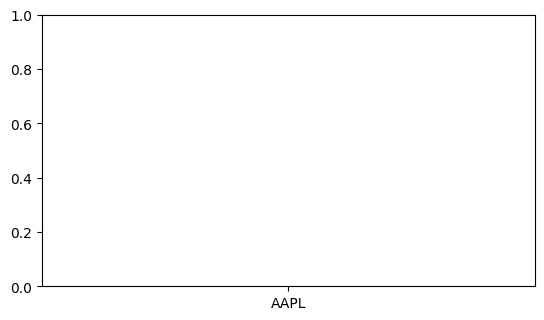

In [ ]:
# Plotting the features
plt.figure(figsize=(14, 12))

# Mean
plt.subplot(3, 2, 1)
# Remove .flatten() so that the shape of the height argument is (7,)
plt.bar(shape_features.index, shape_features.filter(like='_mean').values, color='blue')
plt.title('Mean of Adjusted Close Prices')

# Standard Deviation
plt.subplot(3, 2, 2)
# Remove .flatten() so that the shape of the height argument is (7,)
plt.bar(shape_features.index, shape_features.filter(like='_std').values, color='green')
plt.title('Standard Deviation of Adjusted Close Prices')

# Number of Peaks
plt.subplot(3, 2, 3)
# Remove .flatten() so that the shape of the height argument is (7,)
plt.bar(shape_features.index, shape_features.filter(like='_num_peaks').values, color='orange')
plt.title('Number of Peaks')

# Number of Valleys
plt.subplot(3, 2, 4)
# Remove .flatten() so that the shape of the height argument is (7,)
plt.bar(shape_features.index, shape_features.filter(like='_num_valleys').values, color='red')
plt.title('Number of Valleys')

# Peak-to-Peak Difference
plt.subplot(3, 2, 5)
# Remove .flatten() so that the shape of the height argument is (7,)
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_peak_diff').values, color='purple')
plt.title('Peak-to-Peak Difference')

# Peak-to-Valley Difference
plt.subplot(3, 2, 6)
# Remove .flatten() so that the shape of the height argument is (7,)
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_valley_diff').values, color='brown')
plt.title('Peak-to-Valley Difference')

plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (49,).

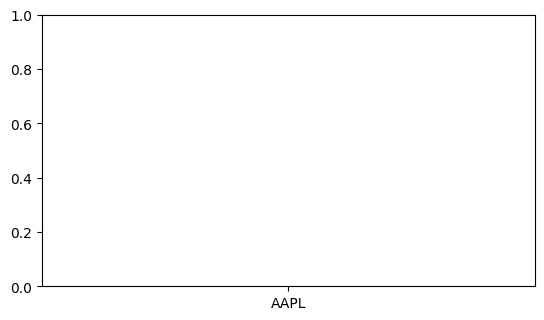

In [ ]:
# Plotting the features
plt.figure(figsize=(14, 12))

# Mean
plt.subplot(3, 2, 1)
# Extract the mean values as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_mean').values.flatten(), color='blue')
plt.title('Mean of Adjusted Close Prices')

# Standard Deviation
plt.subplot(3, 2, 2)
# Extract the standard deviation values as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_std').values.flatten(), color='green')
plt.title('Standard Deviation of Adjusted Close Prices')

# Number of Peaks
plt.subplot(3, 2, 3)
# Extract the number of peaks values as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_num_peaks').values.flatten(), color='orange')
plt.title('Number of Peaks')

# Number of Valleys
plt.subplot(3, 2, 4)
# Extract the number of valleys values as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_num_valleys').values.flatten(), color='red')
plt.title('Number of Valleys')

# Peak-to-Peak Difference
plt.subplot(3, 2, 5)
# Extract the peak-to-peak difference values as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_peak_diff').values.flatten(), color='purple')
plt.title('Peak-to-Peak Difference')

# Peak-to-Valley Difference
plt.subplot(3, 2, 6)
# Extract the peak-to-valley difference values as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_valley_diff').values.flatten(), color='brown')
plt.title('Peak-to-Valley Difference')

plt.tight_layout()
plt.show()

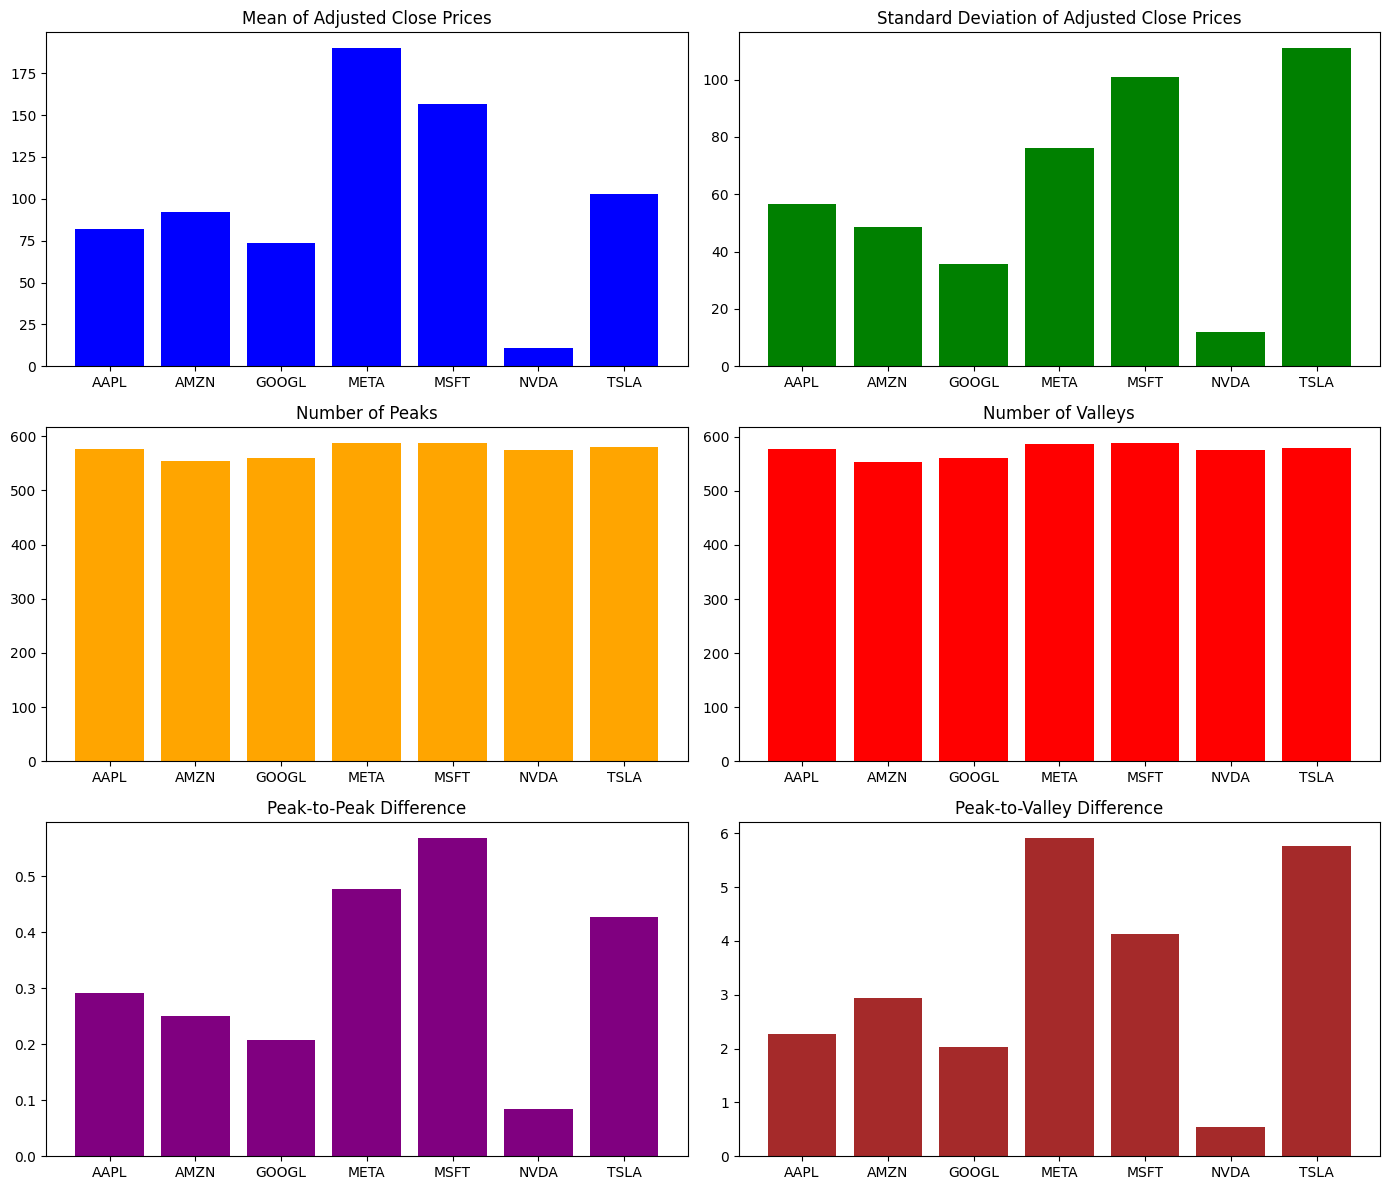

In [ ]:
# Plotting the features
plt.figure(figsize=(14, 12))

# Mean
plt.subplot(3, 2, 1)
# Extract the mean values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_mean').values[0], color='blue')
plt.title('Mean of Adjusted Close Prices')

# Standard Deviation
plt.subplot(3, 2, 2)
# Extract the standard deviation values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_std').values[0], color='green')
plt.title('Standard Deviation of Adjusted Close Prices')

# Number of Peaks
plt.subplot(3, 2, 3)
# Extract the number of peaks values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_num_peaks').values[0], color='orange')
plt.title('Number of Peaks')

# Number of Valleys
plt.subplot(3, 2, 4)
# Extract the number of valleys values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_num_valleys').values[0], color='red')
plt.title('Number of Valleys')

# Peak-to-Peak Difference
plt.subplot(3, 2, 5)
# Extract the peak-to-peak difference values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_peak_diff').values[0], color='purple')
plt.title('Peak-to-Peak Difference')

# Peak-to-Valley Difference
plt.subplot(3, 2, 6)
# Extract the peak-to-valley difference values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_valley_diff').values[0], color='brown')
plt.title('Peak-to-Valley Difference')

plt.tight_layout()
plt.show()

Explanation:
Bar Plots: Each subplot represents a different shape-based feature extracted from the adjusted close prices of the stocks.

Features: Features include mean, standard deviation, number of peaks, number of valleys, peak-to-peak difference, and peak-to-valley difference for each stock.

Usage:
Visual Understanding: The plots provide a visual representation of the extracted features, helping to interpret and compare the shape characteristics of each stock's time series data.

Pattern Recognition: Observing peaks, valleys, and their characteristics can reveal underlying trends and cyclic patterns in the stock prices.

Decision Making: These visualizations assist in making informed decisions related to trading strategies, risk assessment, and market analysis based on the observed features.

Adjust the plotting parameters and feature extraction logic based on your specific requirements and the characteristics of your data. This approach offers a clear and insightful method to explore and understand shape-based features in multivariate time series analysis.

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (49,).

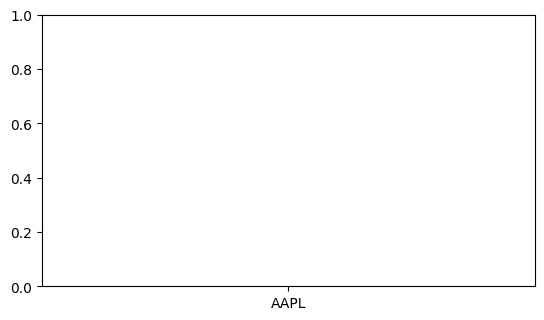

In [ ]:
# Extract shape-based features
shape_features = extract_shape_features(adj_close)

# Plotting the features
plt.figure(figsize=(14, 12))

# Mean
plt.subplot(3, 2, 1)
plt.bar(shape_features.index, shape_features.filter(like='_mean').values.flatten(), color='blue')
plt.title('Mean of Adjusted Close Prices')

# Standard Deviation
plt.subplot(3, 2, 2)
plt.bar(shape_features.index, shape_features.filter(like='_std').values.flatten(), color='green')
plt.title('Standard Deviation of Adjusted Close Prices')

# Number of Peaks
plt.subplot(3, 2, 3)
plt.bar(shape_features.index, shape_features.filter(like='_num_peaks').values.flatten(), color='orange')
plt.title('Number of Peaks')

# Number of Valleys
plt.subplot(3, 2, 4)
plt.bar(shape_features.index, shape_features.filter(like='_num_valleys').values.flatten(), color='red')
plt.title('Number of Valleys')

# Peak-to-Peak Difference
plt.subplot(3, 2, 5)
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_peak_diff').values.flatten(), color='purple')
plt.title('Peak-to-Peak Difference')

# Peak-to-Valley Difference
plt.subplot(3, 2, 6)
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_valley_diff').values.flatten(), color='brown')
plt.title('Peak-to-Valley Difference')

plt.tight_layout()
plt.show()



Performing trend and seasonal decomposition in multivariate time series analysis involves separating the series into trend, seasonal, and residual components

Principal component analysis

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Perform seasonal decomposition for each stock
decomposition = {}
for ticker in adj_close.columns:
    decomposed = seasonal_decompose(adj_close[ticker], model='multiplicative', period=252)  # Adjust period based on seasonality
    decomposition[ticker] = decomposed


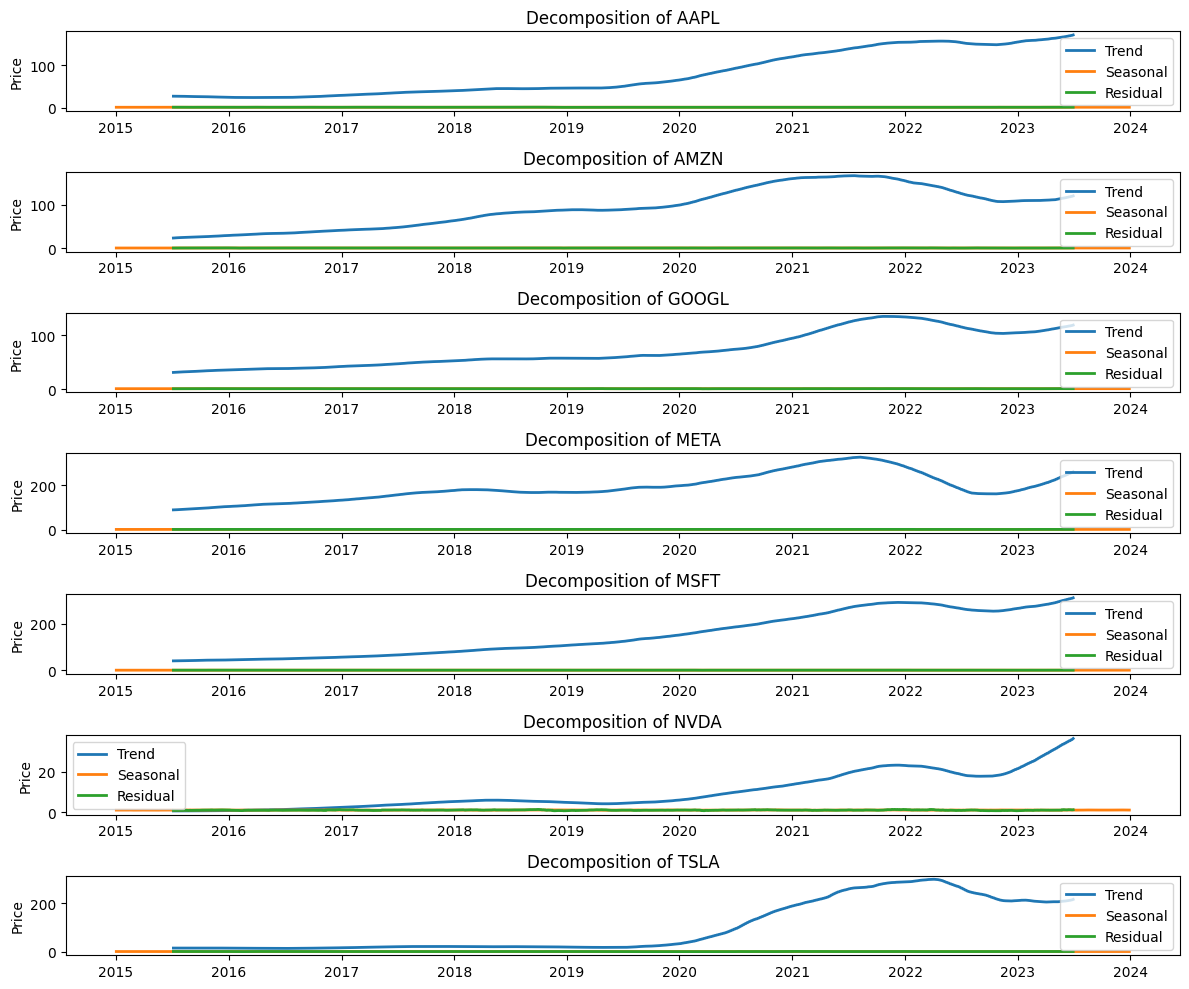

In [ ]:
# Plotting the decomposed components
plt.figure(figsize=(12, 10))

for i, ticker in enumerate(decomposition.keys(), start=1):
    plt.subplot(len(decomposition), 1, i)
    plt.plot(adj_close.index, decomposition[ticker].trend, label='Trend', linewidth=2)
    plt.plot(adj_close.index, decomposition[ticker].seasonal, label='Seasonal', linewidth=2)
    plt.plot(adj_close.index, decomposition[ticker].resid, label='Residual', linewidth=2)
    plt.title(f'Decomposition of {ticker}')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()


5. Window based feature

In [ ]:
!pip install tslearn
import numpy as np
import matplotlib.pyplot as plt
from tslearn.metrics import dtw_subsequence_path
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
scaler = TimeSeriesScalerMeanVariance()
adj_close_normalized = scaler.fit_transform(adj_close.values)


In [ ]:
# Compute DTW between each pair of stocks
motif_indices = {}

for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        series1 = adj_close_normalized[:, i].reshape(-1, 1)
        series2 = adj_close_normalized[:, j].reshape(-1, 1)

        # Compute DTW between series1 and series2
        path, _ = dtw_subsequence_path(series1, series2)

        # Store indices of the similar motifs
        key = f'{tickers[i]}_{tickers[j]}'
        motif_indices[key] = [idx for idx, _ in path]


<ipython-input-49-6efe35414b59>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


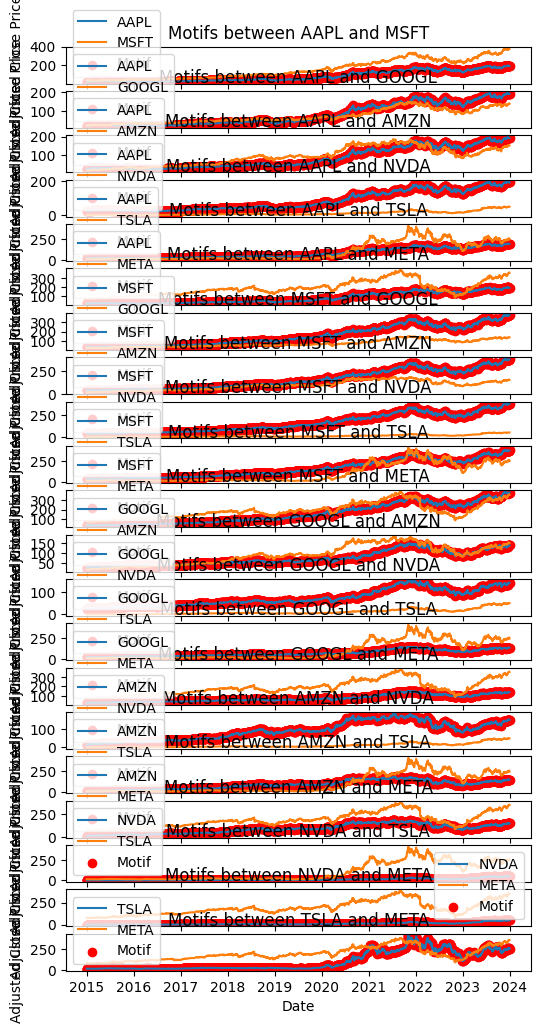

In [ ]:
# Plotting the identified motifs
plt.figure(figsize=(6, 12))

# Plot each pair of stocks
for k, key in enumerate(motif_indices.keys(), start=1):
    stock1, stock2 = key.split('_')

    plt.subplot(len(motif_indices), 1, k)
    plt.plot(adj_close.index, adj_close[stock1], label=stock1)
    plt.plot(adj_close.index, adj_close[stock2], label=stock2)
    plt.scatter(adj_close.index[motif_indices[key]], adj_close[stock1].iloc[motif_indices[key]], color='red', label='Motif')
    plt.title(f'Motifs between {stock1} and {stock2}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  7 of 7 completed
<ipython-input-50-22e400080708>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


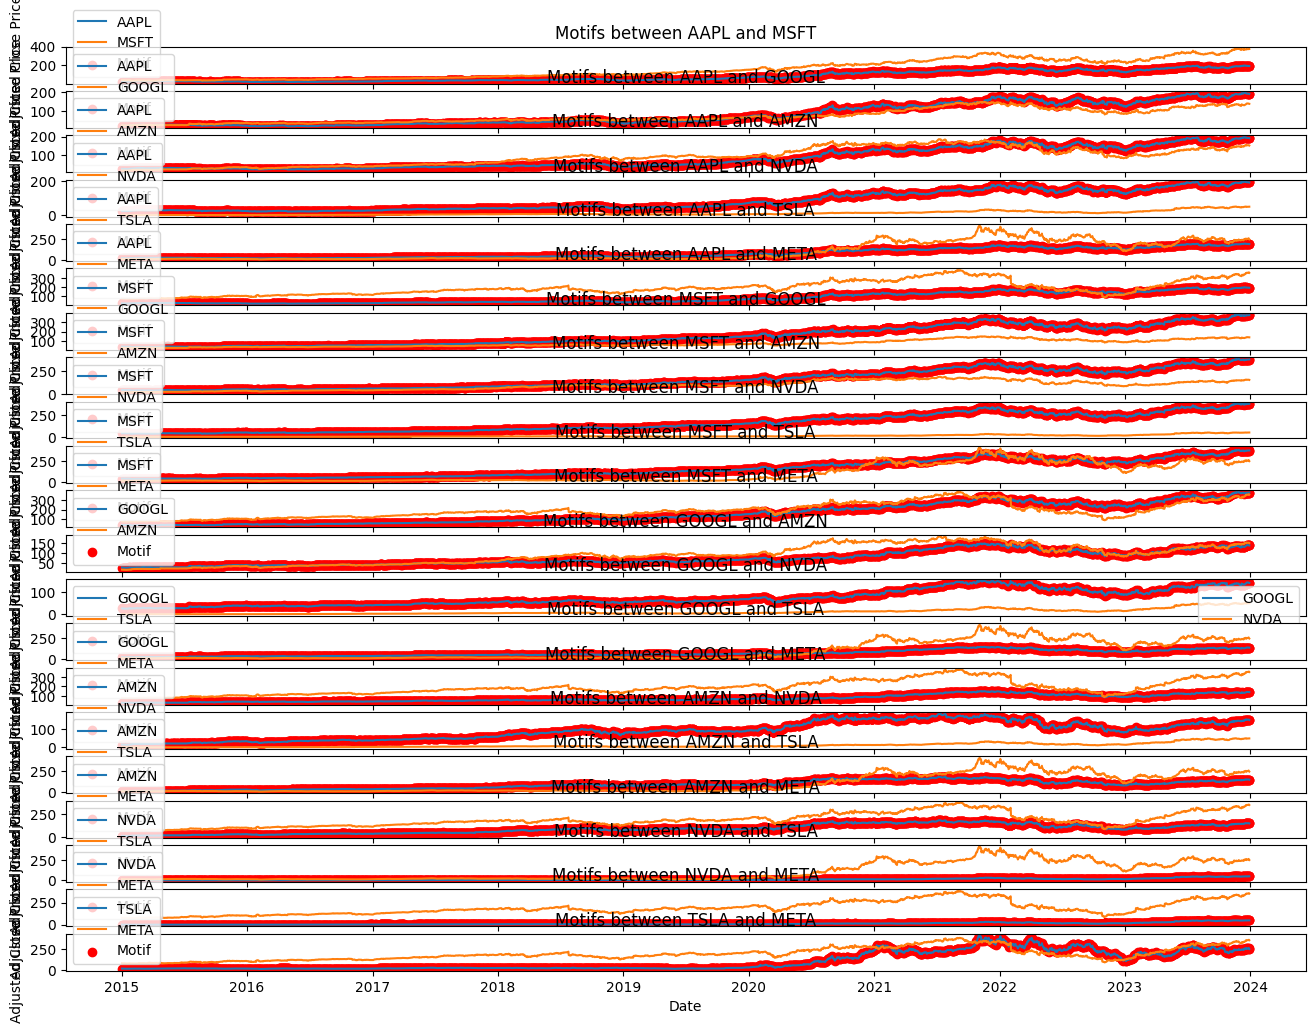

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tslearn.metrics import dtw_subsequence_path
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Define the ticker symbols for the Magnificent 7
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "TSLA", "META"]

# Download historical data from Yahoo Finance
data = yf.download(tickers, start="2015-01-01", end="2023-12-31")

# Select the adjusted close prices
adj_close = data['Adj Close']

# Handle missing values
adj_close = adj_close.fillna(method='ffill')

# Ensure there are no remaining NaNs
adj_close = adj_close.dropna()

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
adj_close_normalized = scaler.fit_transform(adj_close.values)

# Compute DTW between each pair of stocks
motif_indices = {}

for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        series1 = adj_close_normalized[:, i].reshape(-1, 1)
        series2 = adj_close_normalized[:, j].reshape(-1, 1)

        # Compute DTW between series1 and series2
        path, _ = dtw_subsequence_path(series1, series2)

        # Store indices of the similar motifs
        key = f'{tickers[i]}_{tickers[j]}'
        motif_indices[key] = [idx for idx, _ in path]

# Plotting the identified motifs with bigger figure size
plt.figure(figsize=(16, 12))

# Plot each pair of stocks
for k, key in enumerate(motif_indices.keys(), start=1):
    stock1, stock2 = key.split('_')

    plt.subplot(len(motif_indices), 1, k)
    plt.plot(adj_close.index, adj_close[stock1], label=stock1)
    plt.plot(adj_close.index, adj_close[stock2], label=stock2)
    plt.scatter(adj_close.index[motif_indices[key]], adj_close[stock1].iloc[motif_indices[key]], color='red', label='Motif')
    plt.title(f'Motifs between {stock1} and {stock2}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  7 of 7 completed
<ipython-input-54-71dbeb66c3cb>:58: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=2.0)  # Adjusted padding to provide more space between subplots


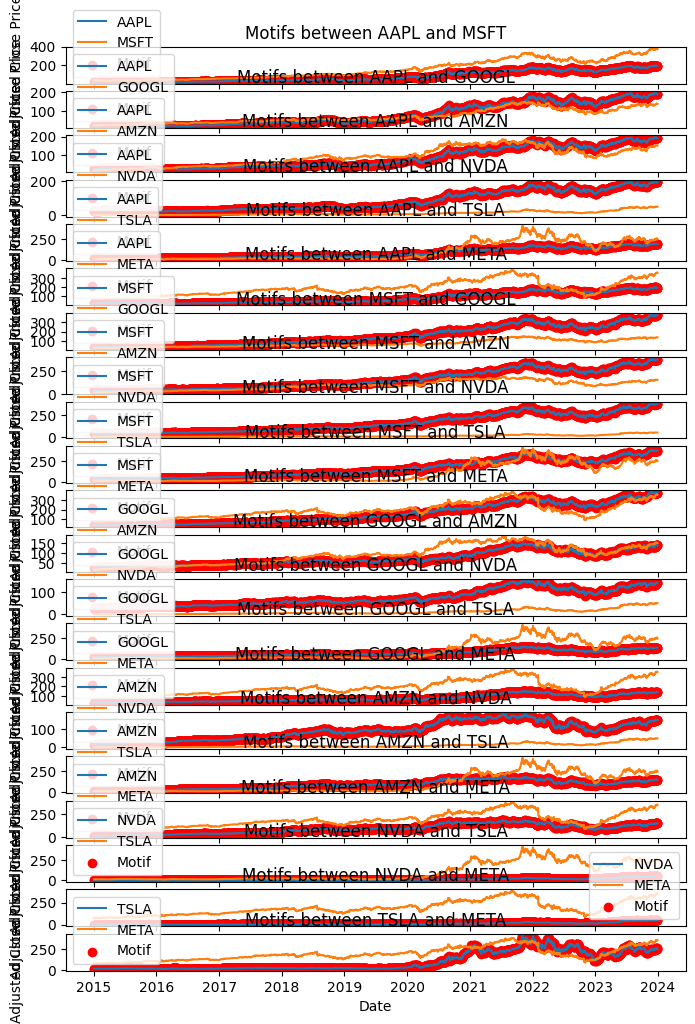

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tslearn.metrics import dtw_subsequence_path
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Define the ticker symbols for the Magnificent 7
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "TSLA", "META"]

# Download historical data from Yahoo Finance
data = yf.download(tickers, start="2015-01-01", end="2023-12-31")

# Select the adjusted close prices
adj_close = data['Adj Close']

# Handle missing values
adj_close = adj_close.fillna(method='ffill')

# Ensure there are no remaining NaNs
adj_close = adj_close.dropna()

# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
adj_close_normalized = scaler.fit_transform(adj_close.values)

# Compute DTW between each pair of stocks
motif_indices = {}

for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):
        series1 = adj_close_normalized[:, i].reshape(-1, 1)
        series2 = adj_close_normalized[:, j].reshape(-1, 1)

        # Compute DTW between series1 and series2
        path, _ = dtw_subsequence_path(series1, series2)

        # Store indices of the similar motifs
        key = f'{tickers[i]}_{tickers[j]}'
        motif_indices[key] = [idx for idx, _ in path]

# Plotting the identified motifs with adjusted figure size and layout
plt.figure(figsize=(8, 12))  # Increased figure size for better readability

# Plot each pair of stocks
for k, key in enumerate(motif_indices.keys(), start=1):
    stock1, stock2 = key.split('_')

    plt.subplot(len(motif_indices), 1, k)
    plt.plot(adj_close.index, adj_close[stock1], label=stock1)
    plt.plot(adj_close.index, adj_close[stock2], label=stock2)
    plt.scatter(adj_close.index[motif_indices[key]], adj_close[stock1].iloc[motif_indices[key]], color='red', label='Motif')
    plt.title(f'Motifs between {stock1} and {stock2}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()

plt.tight_layout(pad=2.0)  # Adjusted padding to provide more space between subplots
plt.show()


need to imptove this code


In [ ]:
pca = PCA(n_components=3)  # You can choose the number of components
pca_data = pca.fit_transform(scaled_data)

# Convert the PCA data back to a DataFrame
pca_data = pd.DataFrame(pca_data, index=adj_close.index, columns=['PC1', 'PC2', 'PC3'])
